<a href="https://colab.research.google.com/github/oneoclockc/deeplearning-for-AI/blob/main/Makerere_Fall_Armyworm_Crop_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/Images.zip

Archive:  /content/drive/MyDrive/Images.zip
  inflating: Images/id_mpj645unlvb6k.jpg  
  inflating: Images/id_vf7jjnjt3i9u7.jpg  
  inflating: Images/id_me3ikxbvg1pdv.jpg  
  inflating: Images/id_vhbqipasvp2ja.jpg  
  inflating: Images/id_lp4lvg9kqqsdm.jpg  
  inflating: Images/id_5k9hpwihkzlib.jpg  
  inflating: Images/id_dphuozuvmo8x6.jpg  
  inflating: Images/id_zsts4k0kqtywj.jpg  
  inflating: Images/id_jgpf07teyj9q9.jpg  
  inflating: Images/id_e5ojnfaxfdcst.jpg  
  inflating: Images/id_uzzds6sqaqi0m.jpg  
  inflating: Images/id_pthnvt4do806c.jpg  
  inflating: Images/id_jyja425z3qiom.jpg  
  inflating: Images/id_mams7qouneq3j.jpg  
  inflating: Images/id_4xfzmmgfc171g.jpg  
  inflating: Images/id_3vf4bxm7i4m5r.jpg  
  inflating: Images/id_0r2hd8hfafwbn.jpg  
  inflating: Images/id_7ihrnacrl4xz5.jpg  
  inflating: Images/id_3xyaaakk3g6qi.jpg  
  inflating: Images/id_zz9lwehh5sxdp.jpg  
  inflating: Images/id_3id4xvc3bdt0k.jpg  
  inflating: Images/id_tsgmslybhuxru.jpg  
  inflatin

In [3]:
import os, shutil, pathlib

original_dir = pathlib.Path("/content/Images") 
new_base_dir = pathlib.Path("/content/윤한세") 

In [4]:
import pandas as pd 
df = pd.read_csv("/content/drive/MyDrive/딥러닝_공모전/Train.csv")

In [5]:
df_pest = df[df["Label"] == 1] 
df_nopest = df[df["Label"] == 0]

In [6]:
print(len(df_nopest))
print(len(df_pest))
# balanced data, tatol 1619 training set 

810
809


In [7]:
file_names = os.listdir(original_dir)

In [8]:
num = 0
for name in file_names :
  for i in df_pest["Image_id"] :
    if name == i :
      src = os.path.join(original_dir, name)
      dst = 'pest'+ str(num) + '.jpg'
      dst = os.path.join(original_dir, dst)
      os.rename(src, dst)
      num += 1 # 파일 이름 바꾸기 - pest

In [9]:
num = 0
for name in file_names :
  for i in df_nopest["Image_id"] :
    if name == i :
      src = os.path.join(original_dir, name)
      dst = 'nopest'+ str(num) + '.jpg'
      dst = os.path.join(original_dir, dst)
      os.rename(src, dst)
      num += 1 # 파일 이름 바꾸기 - nopest

In [10]:
file_names = os.listdir(original_dir)
file_names # train에 속한 것들은 모두 이름 변경 완료 

['nopest647.jpg',
 'id_1v8w8sraqnbz2.jpg',
 'nopest580.jpg',
 'id_vt7saxfk19kf3.jpg',
 'pest205.jpg',
 'pest67.jpg',
 'id_5avjgq6ghg9bn.jpg',
 'nopest345.jpg',
 'id_2gu27a9srjctq.jpg',
 'id_bufztcc1adj2p.jpg',
 'id_oeafp9yi0rhan.jpg',
 'pest762.jpg',
 'nopest445.jpg',
 'id_2oz67goe3wikz.jpg',
 'pest182.jpg',
 'pest712.jpg',
 'pest399.jpg',
 'nopest780.jpg',
 'pest12.jpg',
 'nopest401.jpg',
 'nopest480.jpg',
 'pest597.jpg',
 'id_l0e7ym8962vpv.jpg',
 'id_yap0lnbqullt8.jpg',
 'id_tujmya610mzq8.jpg',
 'id_0ahjbw1wygbq0.jpg',
 'id_rgrcdm8npocqo.jpg',
 'pest729.jpg',
 'id_uwpjlabmua56w.jpg',
 'pest439.jpg',
 'id_zl3jvwb3mck3m.jpg',
 'pest285.jpg',
 'pest23.jpg',
 'nopest259.jpg',
 'nopest133.jpg',
 'id_x2cf9uij6xr30.jpg',
 'pest196.jpg',
 'id_ip9aezlpwp8zr.jpg',
 'nopest141.jpg',
 'id_g4uz84ui23z1l.jpg',
 'id_vwn6a8wx0tjsp.jpg',
 'nopest233.jpg',
 'id_tip85303wy58u.jpg',
 'nopest599.jpg',
 'nopest732.jpg',
 'pest397.jpg',
 'id_r63gbzv2g5q6i.jpg',
 'pest309.jpg',
 'pest486.jpg',
 'pest45.jpg'

In [13]:
def make_subset(subset_name, start_index, end_index):
    for category in ("pest", "nopest"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir) # 폴더 생성
        
        fnames = [f"{category}{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.move(src=original_dir / fname,
                            dst=dir / fname)

In [14]:
# 600*2 training set, 209*2 validation set 
make_subset("train", start_index=0, end_index=600) # training set 600개
make_subset("validation", start_index=600, end_index=809) # validation set 809개 

In [17]:
shutil.move(src=original_dir, dst= new_base_dir / "test" / "testset") # train/validation에 포함되지 않은 이미지를 testset으로 이동

PosixPath('/content/윤한세/test/testset')

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2
%matplotlib inline

In [19]:
im1 = cv2.imread("/content/drive/MyDrive/딥러닝_공모전/윤한세/train/nopest/nopest0.jpg")
im2 = cv2.imread("/content/drive/MyDrive/딥러닝_공모전/윤한세/train/pest/pest1.jpg")

Text(0.5, 0, '(1024, 768, 3)')

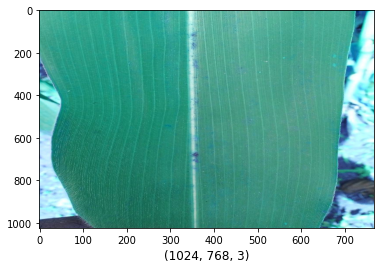

In [20]:
plt.imshow(im1, aspect='auto')
plt.xlabel(f'{im1.shape}', fontsize=12)

Text(0.5, 0, '(1024, 768, 3)')

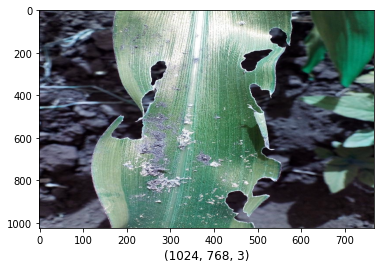

In [21]:
plt.imshow(im2, aspect='auto')
plt.xlabel(f'{im2.shape}', fontsize=12)

In [22]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory( # train dataset 생성(1200개)
    new_base_dir / "train",
    shuffle=True,
    image_size=(224, 224),
    batch_size=32)
validation_dataset = image_dataset_from_directory( # validation dataset 생성(418개)
    new_base_dir / "validation",
    shuffle=True,
    image_size=(224, 224),
    batch_size=32)

Found 1200 files belonging to 2 classes.
Found 418 files belonging to 2 classes.


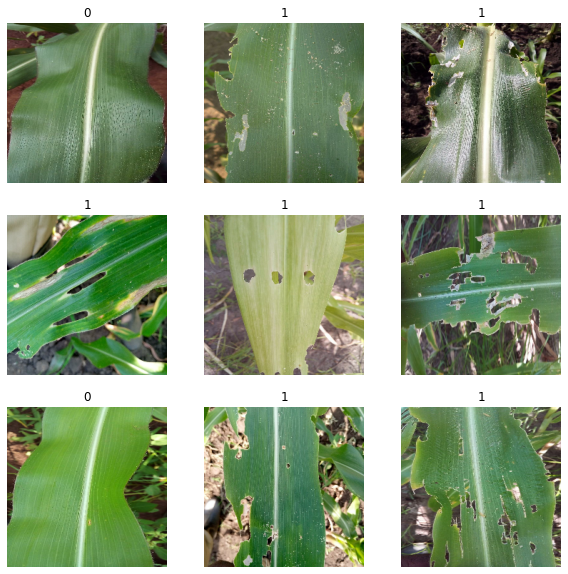

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

# 배치 1을 가져와 확인
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [24]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32,)


In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50

In [26]:
from keras.preprocessing import image
tf.keras.applications.resnet50.preprocess_input # resnet 이미지 전처리 함수? 

<function keras.applications.resnet.preprocess_input>

In [27]:
resnet = ResNet50(include_top = False, weights= 'imagenet', input_shape=(224,224,3))

94781440/94765736 [==============================] - 0s 0us/step


In [28]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [29]:
resnet.trainable = False # convolution 레이어 얼리기

In [30]:
data_augmentation = keras.Sequential( # 데이터 증식
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

In [32]:
# 모델링
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.resnet50.preprocess_input(x)
x = resnet(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem_1   (None, 224, 224, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0   

In [34]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["AUC"])

In [36]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=70,
    validation_data=validation_dataset,
    callbacks=callbacks) 
# epoch 1부터 auc가 너무 높게 나와요.. 이럴 수 있나요? 뭔가 잘못한 것 같은데 잘 모르겠어요..ㅠ

Epoch 1/70
38/38 [==============================] - 12s 275ms/step - loss: 0.4058 - auc: 0.8955 - val_loss: 0.1609 - val_auc: 0.9877
Epoch 2/70
38/38 [==============================] - 10s 233ms/step - loss: 0.1707 - auc: 0.9871 - val_loss: 0.1186 - val_auc: 0.9916
Epoch 3/70
38/38 [==============================] - 13s 301ms/step - loss: 0.1209 - auc: 0.9924 - val_loss: 0.1169 - val_auc: 0.9918
Epoch 4/70
38/38 [==============================] - 10s 225ms/step - loss: 0.1010 - auc: 0.9942 - val_loss: 0.1044 - val_auc: 0.9931
Epoch 5/70
38/38 [==============================] - 9s 212ms/step - loss: 0.0807 - auc: 0.9970 - val_loss: 0.1128 - val_auc: 0.9942
Epoch 6/70
38/38 [==============================] - 10s 229ms/step - loss: 0.0750 - auc: 0.9969 - val_loss: 0.0933 - val_auc: 0.9947
Epoch 7/70
38/38 [==============================] - 10s 230ms/step - loss: 0.0646 - auc: 0.9980 - val_loss: 0.0906 - val_auc: 0.9939
Epoch 8/70
38/38 [==============================] - 10s 226ms/step - l

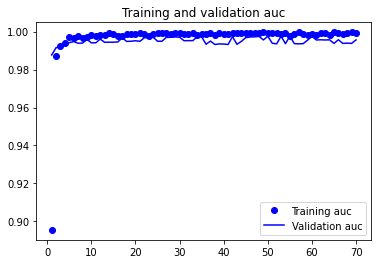

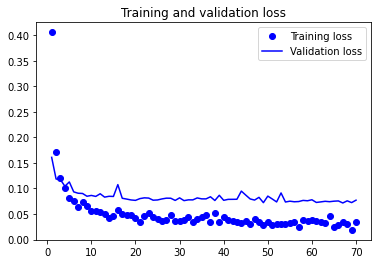

In [37]:
import matplotlib.pyplot as plt
accuracy = history.history["auc"]
val_accuracy = history.history["val_auc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training auc")
plt.plot(epochs, val_accuracy, "b", label="Validation auc")
plt.title("Training and validation auc")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [39]:
test_dataset = image_dataset_from_directory( # test dataset
    new_base_dir/'test',
    shuffle=False,
    image_size=(224, 224),
    batch_size=32)

Found 1081 files belonging to 1 classes.


In [40]:
image_batch = test_dataset.as_numpy_iterator()
image_batch

In [41]:
predictions = model.predict(image_batch) # 예측 
predictions = tf.where(predictions < 0.5, 0, 1) # 이진데이터분류이므로 0 또는 1로 코딩 

In [42]:
predictions.numpy() # prediction값 확인 

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [43]:
data_df = pd.DataFrame(predictions.numpy())
data_df.head() 

,0
0,0
1,0
2,1
3,0
4,0


In [44]:
data_df.columns = ['pred']

In [47]:
testdf = pd.read_csv("/content/drive/MyDrive/딥러닝_공모전/Test.csv")
testdf['pred'] = data_df
testdf.head()

,Image_id,pred
0,id_00exusbkgzw1b.jpg,0
1,id_03dqinf6w0znv.jpg,0
2,id_046yl0cxn3ybz.jpg,1
3,id_04athdtx2abyg.jpg,0
4,id_062aauf9e9jk0.jpg,0


In [49]:
testdf.to_csv('prediction.csv', index=False) # csv로 추출 